In [1]:
import requests
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Consumindo os dados de deputados federais
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome'
resp = requests.get(url).json()

In [2]:
# Colocando os dados em um dataframe Pandas e filtrando algumas das colunas
dfDeputados = DataFrame(resp['dados'], columns = ['id', 'nome', 'siglaPartido', 'siglaUf', 'email'])
dfDeputados.head()

,id,nome,siglaPartido,siglaUf,email
0,220593,Abilio Brunini,PL,MT,dep.abiliobrunini@camara.leg.br
1,204379,Acácio Favacho,MDB,AP,dep.acaciofavacho@camara.leg.br
2,220714,Adail Filho,REPUBLICANOS,AM,dep.adailfilho@camara.leg.br
3,221328,Adilson Barroso,PL,SP,dep.adilsonbarroso@camara.leg.br
4,204560,Adolfo Viana,PSDB,BA,dep.adolfoviana@camara.leg.br


In [3]:
dfDeputados.shape

(513, 5)

In [4]:
# Contando a quantidade de deputados por estado
depCountPorEstado = dfDeputados[['id', 'siglaUf']].groupby(['siglaUf']).count().sort_values(by=['id'], ascending=False).reset_index()
depCountPorEstado

,siglaUf,id
0,SP,70
1,MG,53
2,RJ,46
3,BA,39
4,RS,31
5,PR,30
6,PE,25
7,CE,22
8,MA,18
9,GO,17


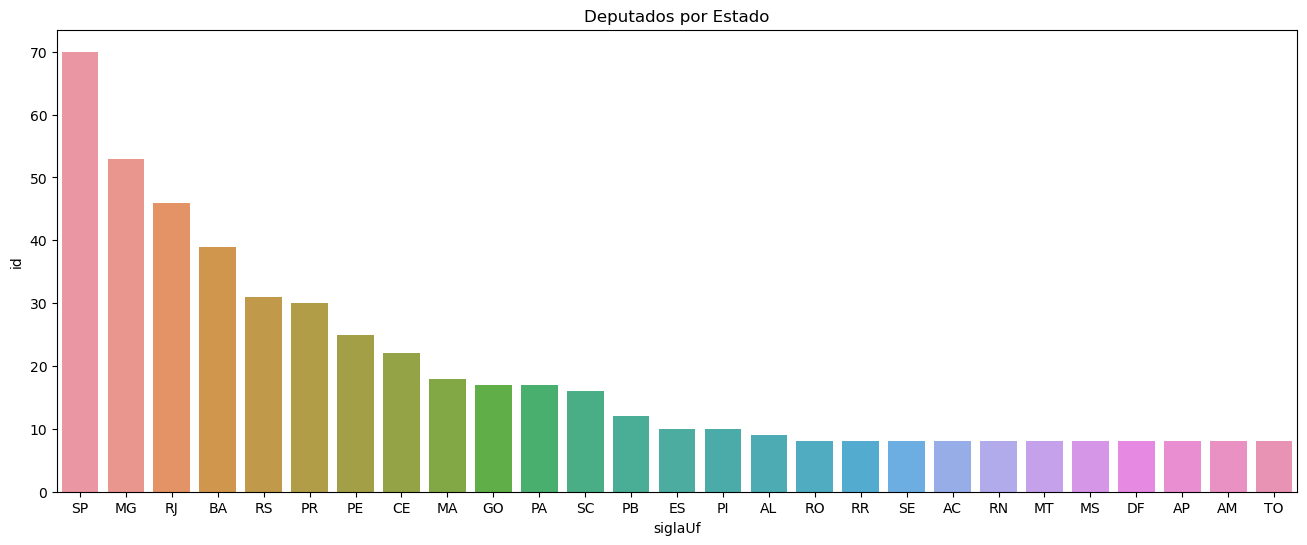

In [5]:
# Construindo um gráfico de barras com os dados acima
plt.figure(figsize = (16, 6))
sns.barplot(data = depCountPorEstado,
           y = 'id',
           x = 'siglaUf').set(title = 'Deputados por Estado')
plt.show()

In [6]:
# A API de despesas não trás "dados pessoais" como como nome, partido e estado.
# Então é necessário fazer uma requisição para cada ID de deputado, inserir os "dados pessoais" e juntar todas as linhas
# em um só DataFrame

# Iniciando uma lista vazia que receberá todas as tabelas de despesas
ExpensesDataFrameList = []

for id in dfDeputados['id']:
    
    # Para cada um dos 513 deputados, fazer uma requisição à API para puxar todas as despesas deles
    URL2 = f'https://dadosabertos.camara.leg.br/api/v2/deputados/{str(id)}/despesas?ordem=ASC&ordenarPor=ano'
    resp2 = requests.get(URL2).json()
    currentDataFrame = DataFrame(resp2['dados'])
    
    # Procurando os dados de nome, partido e estado de acordo com o ID do deputado no dataframe geral de deputados
    nomeDep = dfDeputados[dfDeputados['id'] == id]['nome'].values[0]
    partidoDep = dfDeputados[dfDeputados['id'] == id]['siglaPartido'].values[0]
    estadoDep = dfDeputados[dfDeputados['id'] == id]['siglaUf'].values[0]
    
    # Inserindo os dados nas respectivas colunas
    currentDataFrame.insert(0, "Deputado", nomeDep, True)
    currentDataFrame.insert(1, "Partido", partidoDep, True)
    currentDataFrame.insert(1, "UF", estadoDep, True)
    
    
    ExpensesDataFrameList.append(currentDataFrame)
                                    

In [7]:
# Juntando todas as informações de despesas em um só dataframe
despesasGerais = pd.concat(ExpensesDataFrameList)

In [8]:
despesasGerais.head()

,Deputado,UF,Partido,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
0,Abilio Brunini,MT,PL,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0
1,Abilio Brunini,MT,PL,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,2003936.0,0.0
2,Abilio Brunini,MT,PL,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROAD BRASIL LTDA,48949641000113,1050.00,0.0,,2000174.0,0.0
3,Abilio Brunini,MT,PL,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657503.0,Nota Fiscal,0.0,2023-11-13,01,2033.08,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,2033.08,0.0,,1996163.0,0.0
4,Abilio Brunini,MT,PL,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671906.0,Nota Fiscal,0.0,2023-12-14,23036040,1852.99,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,1852.99,0.0,,2004057.0,0.0


In [9]:
# Verificando valores nulos
despesasGerais.isna().sum()

Deputado               0
UF                     0
Partido                0
ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento          0
numDocumento           0
valorDocumento         0
urlDocumento         512
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
dtype: int64

In [10]:
despesasGerais.dtypes

Deputado              object
UF                    object
Partido               object
ano                  float64
mes                  float64
tipoDespesa           object
codDocumento         float64
tipoDocumento         object
codTipoDocumento     float64
dataDocumento         object
numDocumento          object
valorDocumento       float64
urlDocumento          object
nomeFornecedor        object
cnpjCpfFornecedor     object
valorLiquido         float64
valorGlosa           float64
numRessarcimento      object
codLote              float64
parcela              float64
dtype: object

In [11]:
#Resumo estatístico dos dados numéricos
despesasGerais.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela
count,7655.000000,7655.000000,7.655000e+03,7655.000000,7655.000000,7655.000000,7655.000000,7.655000e+03,7655.000000
mean,2023.022730,11.197387,7.267660e+06,1.795297,1937.212816,1913.589420,9.497790,1.892170e+06,0.004442
std,0.149052,1.426574,1.664345e+06,1.851638,5478.571058,5446.048706,136.742463,4.455593e+05,0.066501
min,2023.000000,1.000000,0.000000e+00,0.000000,-2180.480000,-2180.480000,0.000000,0.000000e+00,0.000000
25%,2023.000000,11.000000,7.647388e+06,0.000000,198.800000,196.665000,0.000000,1.990388e+06,0.000000
50%,2023.000000,11.000000,7.657562e+06,1.000000,303.790000,301.580000,0.000000,1.996343e+06,0.000000
75%,2023.000000,12.000000,7.667007e+06,4.000000,1448.075000,1389.980000,0.000000,2.001416e+06,0.000000
max,2024.000000,12.000000,7.727431e+06,4.000000,164900.000000,164900.000000,8666.660000,2.034726e+06,1.000000


In [12]:
#Filtrando pelo ano de 2023
despesasGerais2023 = despesasGerais.query('ano == 2023')
despesasGerais2023.head()

,Deputado,UF,Partido,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
0,Abilio Brunini,MT,PL,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0
1,Abilio Brunini,MT,PL,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,2003936.0,0.0
2,Abilio Brunini,MT,PL,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROAD BRASIL LTDA,48949641000113,1050.00,0.0,,2000174.0,0.0
3,Abilio Brunini,MT,PL,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657503.0,Nota Fiscal,0.0,2023-11-13,01,2033.08,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,2033.08,0.0,,1996163.0,0.0
4,Abilio Brunini,MT,PL,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671906.0,Nota Fiscal,0.0,2023-12-14,23036040,1852.99,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,1852.99,0.0,,2004057.0,0.0


In [13]:
# Filtrando o dataframe, agrupando os dados pelo nome e partido, e realizando o somatório dos valores das notas.
# Neste caso fora extraído o Top 10 de deputados que mais gastaram no ano de 2023
despesasGerais2023[['Deputado', 'Partido', 'valorDocumento']].groupby(['Deputado', 'Partido']).sum().sort_values(by=['valorDocumento'], ascending=False).reset_index().head(10)

,Deputado,Partido,valorDocumento
0,Gustinho Ribeiro,REPUBLICANOS,208114.40
1,Eunício Oliveira,MDB,173266.32
2,Alberto Mourão,MDB,169772.70
3,Cleber Verde,MDB,161658.73
4,Dra. Alessandra Haber,MDB,151555.89
5,Marcos Pereira,REPUBLICANOS,149987.96
6,Arlindo Chinaglia,PT,147990.56
7,Junior Lourenço,PL,147943.69
8,Hercílio Coelho Diniz,MDB,142447.47
9,Saullo Vianna,UNIÃO,140334.40


In [14]:
# Como o deputado Gustinho Ribeiro fora o quê mais gastou, filtrei somente os gastos dele e reordenei a lista do maior gasto
# pro menor.

gustinho = despesasGerais2023.query("Deputado == 'Gustinho Ribeiro'").sort_values(by=['valorDocumento'], ascending=False)
gustinho.head()

,Deputado,UF,Partido,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
3,Gustinho Ribeiro,SE,REPUBLICANOS,2023.0,12.0,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7669673.0,Nota Fiscal,0.0,2023-12-29,202300000000211,164900.00,https://www.camara.leg.br/cota-parlamentar/doc...,Austregesilo Junior Aragão Melo,08492189000199,164900.00,0.0,,2002803.0,0.0
5,Gustinho Ribeiro,SE,REPUBLICANOS,2023.0,11.0,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7664226.0,Recibos/Outros,1.0,2023-11-30,011/2023,12700.00,https://www.camara.leg.br/cota-parlamentar/doc...,CDC SERVIÇOS E LOCAÇÕES LTDA,37281119000190,12700.00,0.0,,1999833.0,0.0
6,Gustinho Ribeiro,SE,REPUBLICANOS,2023.0,12.0,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7669680.0,Recibos/Outros,1.0,2023-12-22,012,12700.00,https://www.camara.leg.br/cota-parlamentar/doc...,CDC SERVIÇOS E LOCAÇÕES LTDA,37281119000190,12700.00,0.0,,2002804.0,0.0
4,Gustinho Ribeiro,SE,REPUBLICANOS,2023.0,11.0,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7651378.0,Nota Fiscal,0.0,2023-11-28,202300000000007,7000.00,https://www.camara.leg.br/cota-parlamentar/doc...,INSTITUTO FRANCA DE PESQUISAS LTDA,24899123000174,7000.00,0.0,,1992270.0,0.0
7,Gustinho Ribeiro,SE,REPUBLICANOS,2023.0,11.0,PASSAGEM AÉREA - SIGEPA,207850.0,Nota Fiscal,0.0,2023-11-13,ZMRWMQ,2809.91,None,AZUL,,2809.91,0.0,0,0.0,0.0


In [15]:
# Agora agrupei os dados conforme o tipo de despesa e o fornecedor, calculando o somatório destes

gustinho[['tipoDespesa', 'nomeFornecedor', 'cnpjCpfFornecedor', 'valorDocumento']].groupby(['tipoDespesa', 'nomeFornecedor', 'cnpjCpfFornecedor']).sum().sort_values(by=['valorDocumento'], ascending=False).reset_index()

,tipoDespesa,nomeFornecedor,cnpjCpfFornecedor,valorDocumento
0,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Austregesilo Junior Aragão Melo,08492189000199,164900.00
1,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,CDC SERVIÇOS E LOCAÇÕES LTDA,37281119000190,25400.00
2,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,INSTITUTO FRANCA DE PESQUISAS LTDA,24899123000174,7000.00
3,PASSAGEM AÉREA - SIGEPA,TAM,,5454.49
4,PASSAGEM AÉREA - SIGEPA,AZUL,,2809.91
5,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,BROAD BRASIL LTDA,48949641000113,2550.00


In [16]:
# Puxando a URL do documento que comprova o gasto do deputado
docURL = gustinho[gustinho['numDocumento'] == '202300000000211']['urlDocumento'].values[0]
docURL

'https://www.camara.leg.br/cota-parlamentar/documentos/publ/3317/2023/7669673.pdf'

In [17]:
# Conforme a nota fiscal, se trata de gastos com uma agência publicitária chamada AGS, que ficou responsável
# por criar materiais de campanhas como outdoors, busdoors, banners em sites e impulsionamento de cards
# em redes sociais.

In [43]:
# Agora realizando um somatório das despesas por partido, ordenando por valor e retornando o top10
despesasPorPartido = despesasGerais2023[['Partido', 'valorDocumento']].groupby(['Partido']).sum().sort_values(by=['valorDocumento'], ascending=False).sort_values(by=['Partido']).reset_index()
despesasPorPartido

,Partido,valorDocumento
0,AVANTE,156782.98
1,CIDADANIA,64068.88
2,MDB,1717072.98
3,NOVO,28416.14
4,PCdoB,238022.56
5,PDT,467380.36
6,PL,2879571.45
7,PODE,518373.94
8,PP,1112352.26
9,PRD,127924.70


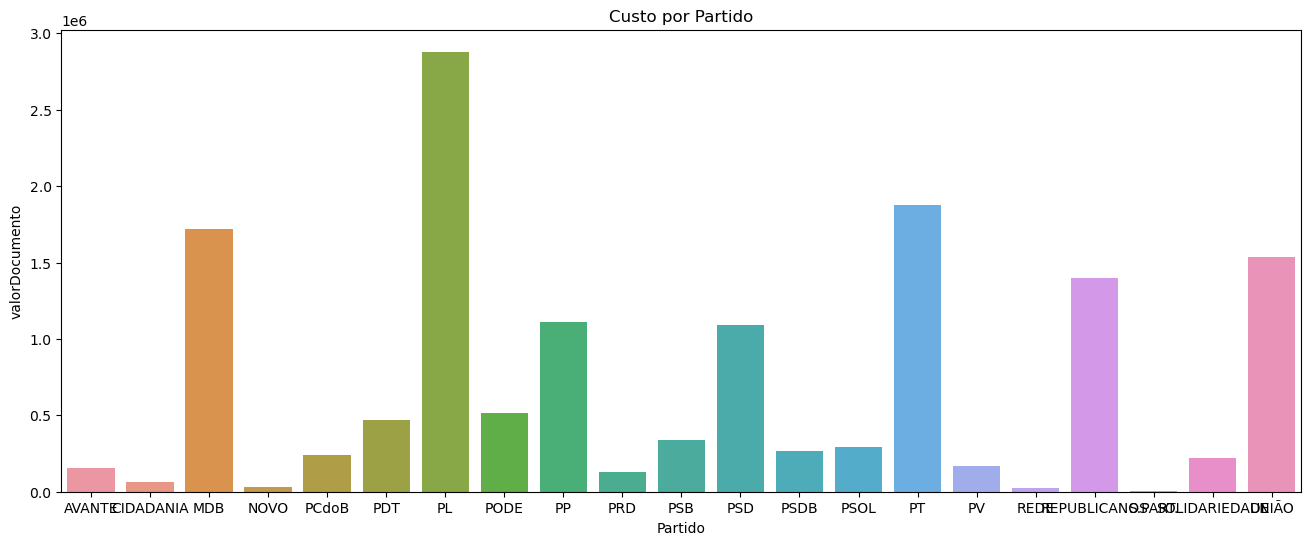

In [46]:
plt.figure(figsize = (16, 6))
sns.barplot(data = despesasPorPartido,
           y = 'valorDocumento',
           x = 'Partido').set(title = 'Custo por Partido')
plt.show()

In [19]:
# Como o partido que mais gastou foi o PL, fora feito um somatório das despesas separadas por tipo.
despesasGerais2023[['Partido', 'tipoDespesa', 'valorDocumento']].query("Partido == 'PL'").groupby(['Partido', 'tipoDespesa']).sum().reset_index().sort_values(by=['valorDocumento'], ascending=False)

,Partido,tipoDespesa,valorDocumento
1,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,1416245.98
5,PL,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,987684.35
0,PL,COMBUSTÍVEIS E LUBRIFICANTES.,226189.04
4,PL,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,151109.00
7,PL,PASSAGEM AÉREA - SIGEPA,54935.39
8,PL,SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...,17000.00
9,PL,TELEFONIA,11783.36
2,PL,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",6776.10
6,PL,PASSAGEM AÉREA - RPA,3948.23
3,PL,LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,3900.00


In [20]:
# Agora retornando as despesas mais caras do PL, somente as de Divulgação da Atividade Parlamentar, agora mostrando os deputados.
despesasGerais2023[['Partido', 'tipoDespesa', 'nomeFornecedor', 'Deputado', 'urlDocumento', 'valorDocumento']].query("Partido == 'PL'").query("tipoDespesa == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'").sort_values(by=['valorDocumento'], ascending=False).reset_index()

,index,Partido,tipoDespesa,nomeFornecedor,Deputado,urlDocumento,valorDocumento
0,3,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,STUDIO AB - CRIATIVIDADE VISUAL EIRELI - EPP,Pr. Marco Feliciano,https://www.camara.leg.br/cota-parlamentar/doc...,95000.0
1,3,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,L Ferreira Paz de Sousa - ME,Junior Lourenço,https://www.camara.leg.br/cota-parlamentar/doc...,71000.0
2,3,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,GRAFICA E EDITORA QUALYTA LTDA - ME,Soraya Santos,https://www.camara.leg.br/cota-parlamentar/doc...,54900.0
3,2,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,GRAFICA E EDITORA QUALYTA LTDA - ME,Soraya Santos,https://www.camara.leg.br/cota-parlamentar/doc...,53400.0
4,12,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,A M LIBERATO,Delegado Caveira,https://www.camara.leg.br/cota-parlamentar/doc...,50200.0
...,...,...,...,...,...,...,...
99,14,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BROAD BRASIL LTDA,Coronel Fernanda,https://www.camara.leg.br/cota-parlamentar/doc...,850.0
100,11,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,RADIODIFUSAO INDIO CONDA LTDA,Caroline de Toni,https://www.camara.leg.br/cota-parlamentar/doc...,630.0
101,14,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Keila Cristina dos Santos,Helio Lopes,https://www.camara.leg.br/cota-parlamentar/doc...,600.0
102,10,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,turbo cloud,Luiz Philippe de Orleans e Bragança,https://www.camara.leg.br/cota-parlamentar/doc...,64.9


In [22]:
# Agora fazendo um somatório de despesas por deputado e os agrupando por partido
somatorioDespesasPorDeputado = despesasGerais2023[['Partido', 'Deputado', 'valorLiquido']].groupby(['Partido', 'Deputado']).sum()
somatorioDespesasPorDeputado.head()

valorLiquido
Partido Deputado                   
AVANTE  André Janones       4264.38
        Bruno Farias        8628.99
        Delegada Ione      13554.70
        Greyce Elias       19435.76
        Luis Tibé          23995.80

In [33]:
# Por fim, calculando uma média de custo por deputado, e agrupando por partido. Exibindo o top 10
mediaCustoPorDeputado = somatorioDespesasPorDeputado.groupby(['Partido']).agg(['mean', 'count']).sort_values(by=[('valorLiquido', 'mean')], ascending=False).head(10).reset_index()
mediaCustoPorDeputado

Partido  valorLiquido      
                          mean count
0  SOLIDARIEDADE  55450.042500     4
1            MDB  39667.793488    43
2   REPUBLICANOS  34678.640000    40
3           PODE  34424.879333    15
4          PCdoB  33152.964286     7
5             PV  30642.604000     5
6             PL  30092.266316    95
7             PT  27328.471912    68
8            PDT  27063.112941    17
9          UNIÃO  26396.853860    57

## Com a tabela anterior, temos a média de custo por deputado dentro dos partidos no ano de 2023, juntamente com a contagem de parlamentares por partido.

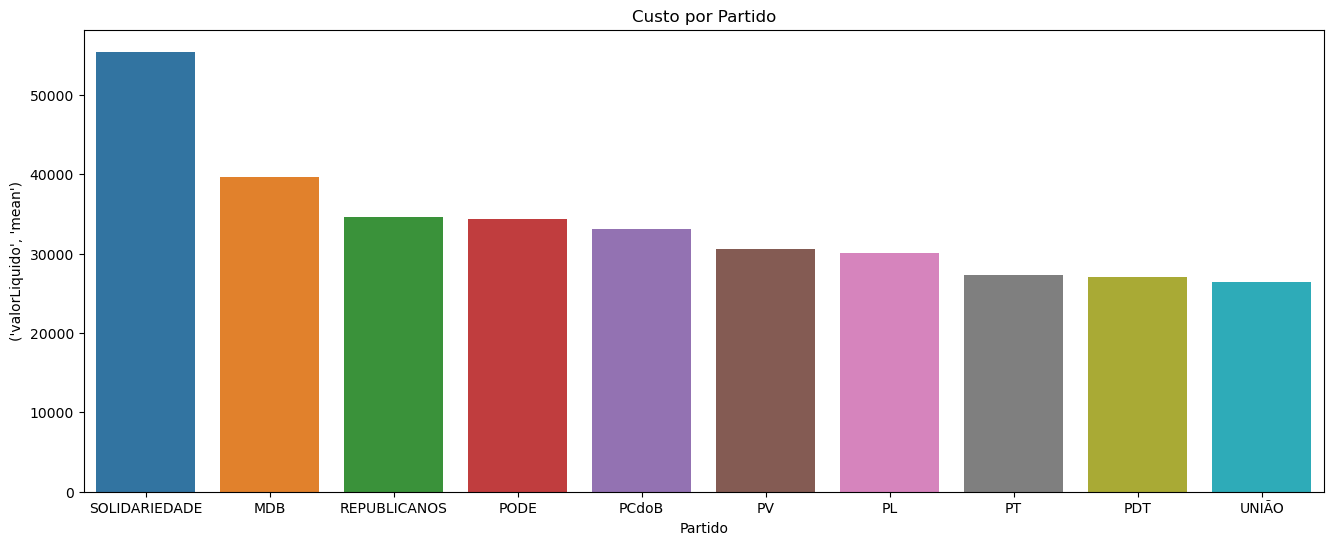

In [47]:
plt.figure(figsize = (16, 6))
sns.barplot(data = mediaCustoPorDeputado,
           y = ('valorLiquido', 'mean'),
           x = 'Partido').set(title = 'Custo por Partido')
plt.show()